In [1]:
# Plotting Libraries 
import matplotlib.pyplot as plt
%matplotlib notebook
%config InlineBackend.print_figure_kwargs = {}
import seaborn as sns
sns.set_style("whitegrid")

# Pyswmm engine with ICC 
from pyswmm_lite import Env

# Bayesian Optimization
import numpy as np
from GPyOpt.methods import BayesianOptimization
import tslearn.metrics as ts
import copy
# Nodes as List
NODES_LIS = {'93-49743' : 'OR39',
             '93-49868' : 'OR34',
             '93-49919' : 'OR44',
             '93-49921' : 'OR45',
             '93-50074' : 'OR38',
             '93-50076' : 'OR46',
             '93-50077' : 'OR48',
             '93-50081' : 'OR47',
             '93-50225' : 'OR36',
             '93-90357' : 'OR43',
             '93-90358' : 'OR35'}

def run_swmm(valve_set1, valve_set2, valve_set3, valve_set4):
    env = Env("./aa_0360min_025yr.inp")

    data = {}
    data["f1"] = []
    data["f2"] = []
    data["f3"] = []
    data["f4"] = []
    data["overflow1"]  = []
    data["overflow2"]  = []
    data["overflow3"]  = []
    data["overflow4"]  = []
    done = False
    for time in range(0, 35000):
        # set the gate_position 
        env.set_gate(NODES_LIS["93-50077"], valve_set1)
        env.set_gate(NODES_LIS["93-50076"], valve_set2)
        env.set_gate(NODES_LIS["93-50081"], valve_set3)
        env.set_gate(NODES_LIS["93-49921"], valve_set4)
        
        # record_data
        data["f1"].append(env.flow(NODES_LIS["93-50077"]))
        data["f2"].append(env.flow(NODES_LIS["93-50076"]))
        data["f4"].append(env.flow(NODES_LIS["93-49921"]))
        data["f3"].append(env.flow(NODES_LIS["93-50081"]))
        
        data["overflow1"].append(env.sim._model.getNodeResult("93-50077", 4))
        data["overflow2"].append(env.sim._model.getNodeResult("93-50076", 4))
        data["overflow4"].append(env.sim._model.getNodeResult("93-49921", 4))
        data["overflow3"].append(env.sim._model.getNodeResult("93-50081", 4))
        
        # step through simulation
        done = env.step()
        
    overflows = {}
    overflows["o1"] = sum(data["overflow1"])
    overflows["o2"] = sum(data["overflow2"])
    overflows["o3"] = sum(data["overflow3"])
    overflows["o4"] = sum(data["overflow4"])
    
    env.reset()
    
    return data, overflows

In [2]:
# Plot the uncontrolled reponse 
un_data, un_overflow = run_swmm(1.0, 1.0, 1.0, 1.0)

In [3]:
import scipy.signal as spy

In [6]:
target_dwn_sample = spy.decimate(un_data["f1"], 50)

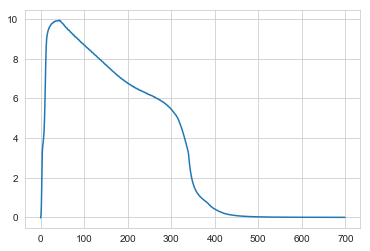

In [7]:
plt.plot(target_dwn_sample)

In [8]:
un_data1, un_overflow1 = run_swmm(0.5, 1.0, 1.0, 1.0)

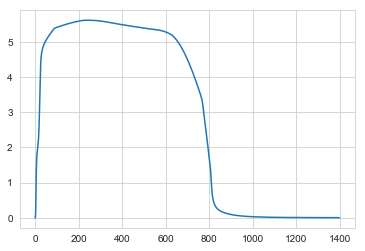

In [14]:
target_dwn_sample = spy.decimate(un_data1["f1"], 25)
plt.plot(target_dwn_sample)